In [1]:
# to read .pkl files
import pickle

# to create and manipulate dataframe
import pandas as pd

# for Scientific and vector computation
import numpy as np

#to plot (visualize) the data
from matplotlib import pyplot as plt

from scipy import optimize

import random

<p> Reading the file train_image.pkl and train_label.pkl. <br/>
    And storing the result in a dataframe 'data' </p>

In [2]:
with open('train_image.pkl','rb') as f:
    data = pd.DataFrame(pickle.load(f))
with open('train_label.pkl','rb') as fp:
    df = pd.DataFrame(pickle.load(fp))
data = pd.concat([data,df],axis=1)
num = [p for p in range(8000)]
random.shuffle(num)
#print(num)
data_array = np.zeros((8000,785))
X = data.iloc[num,:].values
#display(data)

display(data)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
0,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,11,142,200,...,110,158,18,0,3,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,80,46,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,58,121,...,23,30,37,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,42,...,32,19,23,13,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,39,90,...,149,186,0,0,2,0,0,0,0,0
8,0,0,0,0,0,0,0,73,143,149,...,57,119,97,7,0,0,0,0,0,0
9,0,0,0,0,0,0,0,96,155,0,...,197,234,101,0,0,0,0,0,0,0


<p> Since there are 784 columns, so the image will be <strong>28 X 28</strong> grid.<br/> The cell given below tries to visualize the data to gain more understanding of it </p>

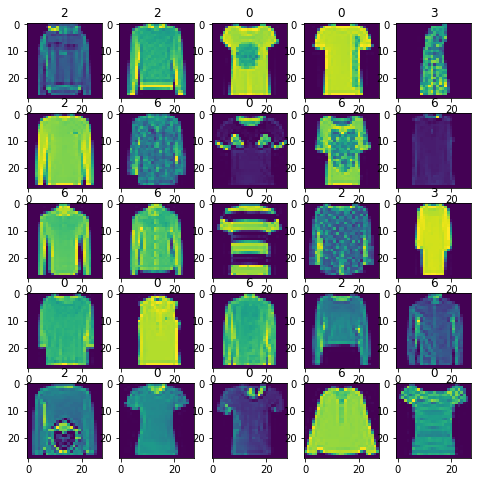

In [3]:
m = 28

# x stores the pixel density of one complete 28 X 28 grid
x = np.zeros((m,m))

# creating 25 subplots from the info in dataset given  
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
for a,k in zip(ax.flat,range(25)):
    for i in range(0,756,28):
        j = int(i/28)
        x[j,:] = X[k,i:i+28]
    a.imshow(x)
    a.set_title(X[k,784])

In [4]:
labels = np.unique(X[:,784])
print(labels)
X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)

[0 2 3 6]


<p>Creating :
    <ol>
        <li>Training set : X_train,Y_train (60 % of data provided i.e contains 4800 rows)</li>
        <li>Test set : X_test, Y_test (20 % i.e. 1600 rows)</li>
        <li>Validation set : X_val, Y_val (20% i.e. 1600 rows)</li>
    </ol>
    Here X and Y contains the data for images and their label respectively. We're creating different sets so as to select good regularization parameter and check the accuracy/precision of our algorithm.
</p>

In [5]:
#X_train = np.zeros((4800,785))
Y_train = np.zeros(4800)
X_train = X[:4800,:-1]
Y_train = X[:4800,785]
X_val = X[4800:6400,:-1]
Y_val = X[4800:6400,785]
X_test = X[6400:,:-1]
Y_test = X[6400:,785]

In [6]:
def normalization(x_):
    mean = np.mean(x_[:,1:],axis=0)
    standard_deviation = np.std(x_[:,1:],axis=0)
    print(mean)
    m = x_.shape[1]
    for i in range(m-1):
        x_[:,i+1] = (x_[:,i+1] - mean[i])/standard_deviation[i]
    return x_

In [7]:
def feature_scaling(x_):
    for i in range(x_.shape[1]-1):
        if(np.ptp(x_[:,i+1])!=0):
            x_[:,i+1] = (x_[:,i+1]-np.amin(x_[:,i+1]))/np.ptp(x_[:,i+1])
        if (np.amax(x_[:,i+1])!=0):
            x_[:,i+1] = (x_[:,i+1])/np.amax(x_[:,i+1])
    return x_

In [8]:
X_train_norm = feature_scaling(X_train)
print(X_train_norm.shape)
dk = pd.DataFrame(X_train_norm)
display(dk)
X_test_norm = feature_scaling(X_test)
X_val_norm = feature_scaling(X_val)
print(feature_scaling(np.array([[1,2,3],[4,5,6]])))

(4800, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209607,...,0.000000,0.000000,0.000000,0.216535,0.204,0.180392,0.000000,0.000000,0.000000,0.000000
1,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017467,...,0.000000,0.003922,0.000000,0.122047,0.548,0.462745,0.226190,0.000000,0.000000,0.000000
2,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129630,0.489083,...,0.694118,0.592157,0.674510,0.547244,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017467,...,0.635294,0.611765,0.705882,0.539370,0.000,0.000000,0.003968,0.000000,0.000000,0.000000
4,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.082353,0.141176,0.000000,0.000000,0.448,0.552941,0.166667,0.000000,0.000000,0.000000
6,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.078431,0.039216,0.000000,0.000000,0.004,0.000000,0.000000,0.000000,0.000000,0.000000
7,1.0,0.0,0.000000,0.000000,0.009524,0.000000,0.006024,0.000000,0.000000,0.000000,...,0.094118,0.086275,0.078431,0.051181,0.060,0.007843,0.000000,0.000000,0.000000,0.000000
8,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.317647,0.349020,0.380392,0.000000,0.000,0.003922,0.000000,0.000000,0.000000,0.000000
9,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.109804,0.141176,0.184314,0.066929,0.000,0.000000,0.000000,0.000000,0.000000,0.000000


[[1 0 0]
 [4 1 1]]


In [9]:
def sigmoid(z):
    sig = np.exp(-z)
    sig = 1  + sig
    sig = 1/sig
    return sig

In [10]:
def lrCostFunction(theta,x_,y_,lambda_):
    if y_.dtype == bool:
        y_ = y_.astype(int)
    m = y_.size
    J = -1/m * np.sum(y_*np.log(sigmoid(np.dot(x_,theta))) + (1-y_)*np.log(1-sigmoid(np.dot(x_,theta))))
    J = J + lambda_/(2*m) * np.sum(theta[1:]**2)
    grad = np.dot(x_.T,sigmoid(np.dot(x_,theta))-y_)
    grad[1:] = grad[1:] + (lambda_/m)*theta[1:]
    return J,grad

In [11]:
def calcTheta(x_,y_,initial_theta,lambda_,labels):
    options = {'maxiter':50}
    all_theta = np.zeros((len(labels),x_.shape[1]))
    for (c,j) in zip(labels,range(len(labels))) :
        res = optimize.minimize(lrCostFunction,initial_theta,(x_,(y_==c),lambda_),jac=True,method='TNC',options=options)
        all_theta[j:] = res.x
    return all_theta

In [12]:
n = X_train.shape[1]
m = len(labels)
print(X_train.shape)
initial_theta = np.zeros((n,1))
print(initial_theta.shape)
print(Y_train.shape)
lambda_ = 0.0
print(np.amin(X_train_norm))
print(np.amax(X_train_norm))
all_theta_calc = calcTheta(X_train_norm,Y_train,initial_theta,lambda_,labels)
print(all_theta_calc)

(4800, 785)
(785, 1)
(4800,)
0.0
1.0
[[-4.95067527e-01  4.85919930e-03  3.92322462e-03 ... -2.00830383e-02
  -1.16349982e-02 -1.11784884e-02]
 [-1.52582810e+00 -3.33059087e-03  2.18527562e-02 ...  7.66740354e-02
   5.01648953e-02  5.00730362e-02]
 [-5.79027400e-01 -4.74204782e-04 -2.05139276e-03 ...  1.19897881e-05
  -2.04945071e-03  2.10808793e-03]
 [-5.93687401e-01  7.52231915e-05 -1.71819843e-02 ... -2.56953043e-02
  -2.15836441e-02 -2.77142635e-02]]


In [13]:
def predict(x_,all_theta,labels):
    idx = np.argmax(np.dot(x_,all_theta.T),axis=1)
    return labels[idx]

In [14]:
y_test_calc = predict(X_test_norm,all_theta_calc,labels)
y_val_calc = predict(X_val_norm,all_theta_calc,labels)
y_train_calc = predict(X_train_norm,all_theta_calc,labels)

In [15]:
def build_confusion_matrix(Y_test_calc,Y_test,labels):
    k= len(labels)
    confusion_matrix = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            confusion_matrix[i][j] = np.sum((Y_test == labels[i]) & (Y_test_calc == labels[j]))
    conf_mat_df = pd.DataFrame(confusion_matrix)
    display(conf_mat_df)
    #for line in confusion_matrix:
     #   print(*line)
    return confusion_matrix

In [16]:
print(Y_test.shape)
confusion_matrix = build_confusion_matrix(y_test_calc,Y_test,labels)
confusion_matrix_val = build_confusion_matrix(y_val_calc,Y_val,labels)
confusion_matrix_train = build_confusion_matrix(y_train_calc,Y_train,labels)

(1600,)


,0,1,2,3
0,349.0,7.0,22.0,48.0
1,5.0,363.0,9.0,51.0
2,24.0,4.0,324.0,14.0
3,55.0,53.0,15.0,257.0


,0,1,2,3
0,313.0,7.0,12.0,52.0
1,5.0,364.0,6.0,42.0
2,12.0,8.0,359.0,11.0
3,64.0,49.0,23.0,273.0


,0,1,2,3
0,1015.0,17.0,55.0,103.0
1,23.0,997.0,12.0,123.0
2,48.0,15.0,1149.0,32.0
3,186.0,146.0,36.0,843.0


In [17]:
def calculate_recall_precision(confusion_matrix):
    precision_array = np.diag(confusion_matrix) / np.sum(confusion_matrix,axis=0)
    recall_array = np.diag(confusion_matrix)/np.sum(confusion_matrix,axis=1)
    precision = np.mean(precision_array)
    recall = np.mean(recall_array)
    print("precision is : %s"% precision)
    print("recall is : %s"% recall)
    return precision,recall

In [18]:
precision,recall = calculate_recall_precision(confusion_matrix)

precision is : 0.8065979963066625
recall is : 0.8072353396314009


In [16]:
def calc_Lambda(X_val,Y_val,initial_theta,X_train,Y_train):
    lambda_values = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
    cost_train = []
    cost_val = []
    for lambda_ in lambda_values:
        Theta_temp = calcTheta(X_val,Y_val,initial_theta,lambda_,labels)
        cost_train.append(lrCostFunction(Theta_temp,X_train,Y_train,lambda_)[0])
        cost_val.append(lrCostFunction(Theta_temp,X_val,Y_val,lambda_)[0])
    plt.plot(cost_val,lambda_values,'b-')
    plt.plot(cost_train,lambda_values,'r-')

In [18]:
calc_Lambda(X_val,Y_val,initial_theta,X_train,Y_train)

/home/deepti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/deepti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


ValueError: shapes (4800,785) and (4,785) not aligned: 785 (dim 1) != 4 (dim 0)